#### Step 1: Data Exploration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'path_to_dataset.csv' with the actual file path)
# Assuming the dataset is in CSV format after downloading from IEEE Xplore
df =pd.read_csv('SAML-D.csv')

In [4]:

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Time                    1048575 non-null  object 
 1   Date                    1048575 non-null  object 
 2   Sender_account          1048575 non-null  int64  
 3   Receiver_account        1048575 non-null  int64  
 4   Amount                  1048575 non-null  float64
 5   Payment_currency        1048575 non-null  object 
 6   Received_currency       1048575 non-null  object 
 7   Sender_bank_location    1048575 non-null  object 
 8   Receiver_bank_location  1048575 non-null  object 
 9   Payment_type            1048575 non-null  object 
 10  Is_laundering           1048575 non-null  int64  
 11  Laundering_type         1048575 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 96.0+ MB
None

First 5 Rows:
       Time        D

#### Step 2: How Many Data Have Features and Their Correlation

##### - Features: Identify how many data points have values for each feature (non-null counts).
##### - Correlation: Calculate the correlation between numerical features to see how they relate.


Missing Values per Feature:
Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

Non-Null Counts per Feature:
Time                      1048575
Date                      1048575
Sender_account            1048575
Receiver_account          1048575
Amount                    1048575
Payment_currency          1048575
Received_currency         1048575
Sender_bank_location      1048575
Receiver_bank_location    1048575
Payment_type              1048575
Is_laundering             1048575
Laundering_type           1048575
dtype: int64

Correlation Matrix:
                  Sender_account  Receiver_account    Amount  Is_laundering
Sender_account          1.000000         -0.000779  0.000961       0.00310

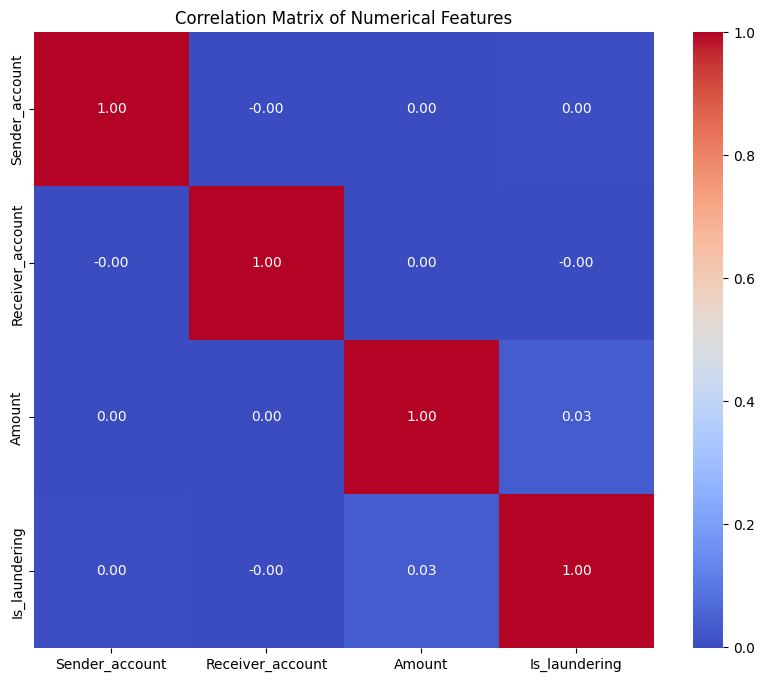

In [5]:
# Check for missing values in each feature
print("\nMissing Values per Feature:")
print(df.isnull().sum())

# Number of data points with non-null values for each feature
print("\nNon-Null Counts per Feature:")
print(df.count())

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### Step 3: Label Dataset (Counting as Transaction Category AML)

In [6]:
# Ensure 'typology' exists in the DataFrame
if 'typology' in df.columns and not df['typology'].isna().all():
    # Drop missing values from 'typology'
    df = df.dropna(subset=['typology'])

    # Convert 'typology' to string
    df['typology'] = df['typology'].astype(str)

    # Count occurrences of each typology
    label_counts = df['typology'].value_counts()

    print("\nTransaction Counts by AML Typology:")
    print(label_counts)

    # Visualize label distribution
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar', color='coral')
    plt.title("Distribution of AML Typologies")
    plt.xlabel("Typology")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'typology' column is missing or contains only NaN values.")


Error: 'typology' column is missing or contains only NaN values.


#### Step 4: Money Laundering Presence (Many or Don’t Have)

In [7]:
# If there's a binary column like 'is_ml' (1 = ML, 0 = not ML), replace with actual column name
if 'is_ml' in df.columns:
    ml_counts = df['is_ml'].value_counts()
    print("\nMoney Laundering Presence:")
    print(ml_counts)

    # Visualize
    plt.figure(figsize=(6, 6))
    ml_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not ML', 'ML'])
    plt.title("Proportion of Money Laundering Transactions")
    plt.show()
else:
    print("\nAll transactions may be ML-related, as this is a synthetic AML dataset.")
    print("Total transactions:", len(df))


All transactions may be ML-related, as this is a synthetic AML dataset.
Total transactions: 1048575


#### Step 5: Visualization of the Dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'typology' and 'amount' exist and drop missing values
if {'typology', 'amount'}.issubset(df.columns):
    df = df.dropna(subset=['typology', 'amount'])

    # Convert 'typology' to string to avoid categorical issues
    df['typology'] = df['typology'].astype(str)

    # Boxplot of transaction amounts by typology
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='typology', y='amount', data=df)
    plt.title("Transaction Amounts by AML Typology")
    plt.xlabel("Typology")
    plt.ylabel("Amount")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'typology' or 'amount' column is missing from the DataFrame.")

# If 'country' exists, visualize transactions by country
if 'country' in df.columns and not df['country'].isna().all():
    df['country'] = df['country'].astype(str)  # Ensure 'country' is a string
    country_counts = df['country'].value_counts().head(10)  # Top 10 countries

    plt.figure(figsize=(10, 6))
    country_counts.plot(kind='bar', color='skyblue')
    plt.title("Top 10 Countries by Transaction Count")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.show()
else:
    print("Error: 'country' column is missing or contains only NaN values.")


Error: 'typology' or 'amount' column is missing from the DataFrame.
Error: 'country' column is missing or contains only NaN values.
